In [23]:
%matplotlib inline

In [24]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
from scipy import linalg as LA
import matplotlib.pyplot as plt
import math

# (a)

In [25]:
class TwoBody():
    
    # input the initial value
    def __init__(self, m_1 = 1.,m_2 = 1.,G = 1.
              ):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    # the right side of the equation    
    def dy_dt(self, t, f):
        
        x_1,x_2,y_1,y_2,x_1_dot,x_2_dot,y_1_dot,y_2_dot = f
        
        g = -self.G * self.m_1 * self.m_2 * ((x_1 - x_2)**2 + (y_1 - y_2)**2)**(-3./2.)
        
        x_1_ddot = g * (x_1 - x_2) / self.m_1
        x_2_ddot = g * (x_2 - x_1) / self.m_2
        y_1_ddot = g * (y_1 - y_2) / self.m_1
        y_2_ddot = g * (y_2 - y_1) / self.m_2
    
        return x_1_dot,x_2_dot,y_1_dot,y_2_dot,x_1_ddot,x_2_ddot,y_1_ddot,y_2_ddot
    
    #solve the equation
    def solve_ode(self,t_pts,x_1i,x_2i,y_1i,y_2i,x_1_doti,x_2_doti,y_1_doti,y_2_doti,
                  abserr=1.0e-9,relerr=1.0e-9):
        
        y=[x_1i,x_2i,y_1i,y_2i,x_1_doti,x_2_doti,y_1_doti,y_2_doti]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot =solution.y
        
        return x_1, x_2, y_1, y_2, x_1_dot, x_2_dot, y_1_dot, y_2_dot

        

In [26]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [27]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# (a)

In [92]:


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 2
m_1 = 1.
m_2 = 1.

# Instantiate two bodies


In [93]:

#initial values
x_1i = 1.
x_2i = -1.
y_1i = 0.
y_2i = 0. 
x_1i_dot = 0.
x_2i_dot = 0.
y_1i_dot = 1.
y_2i_dot = -1.

tb = TwoBody(m_1 = m_1, m_2 = m_2, G = G)

x_1,x_2,y_1,y_2,x_1_dot,x_2_dot,y_1_dot,y_2_dot = tb.solve_ode(t_pts,x_1i,x_2i,y_1i,y_2i,
                                                                     x_1i_dot,x_2i_dot,y_1i_dot,y_2i_dot) 

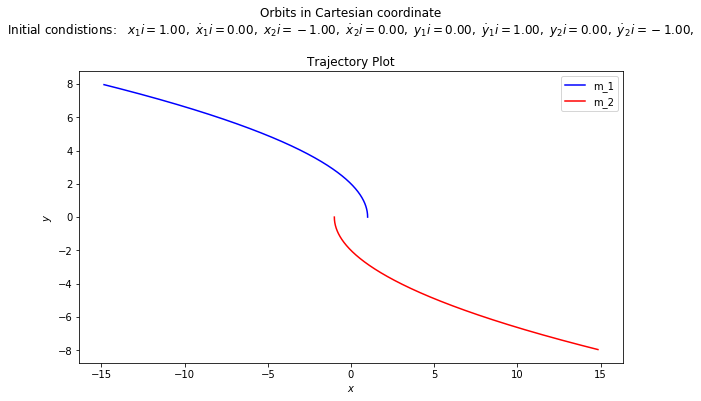

In [94]:

# Labels for individual plot axes
trajectory_labels = (r'$x$', r'$y$')

fig = plt.figure(figsize=(15,5))

overall_title = 'Orbits in Cartesian coordinate' + \
                '\n' + \
                'Initial condistions:  ' + \
                rf' $x_1i = {x_1i:.2f},$' + \
                rf' $\dot x_1i = {x_1i_dot:.2f},$' + \
                rf' $x_2i = {x_2i:.2f},$' + \
                rf' $\dot x_2i = {x_2i_dot:.2f},$' + \
                rf' $y_1i = {y_1i:.2f},$' + \
                rf' $\dot y_1i = {y_1i_dot:.2f},$' + \
                rf' $y_2i = {y_2i:.2f},$' + \
                rf' $\dot y_2i = {y_2i_dot:.2f},$' + \
                '\n'    
fig.suptitle(overall_title, va='baseline')


ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=trajectory_labels, 
            color='blue',
            label='m_1', 
            title='Trajectory Plot',
            ax=ax_a)  

plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=trajectory_labels,
            color='red',
            label='m_2',
            ax=ax_a)  

ax_a.set_aspect(1)
fig.tight_layout()


# (b)

In [95]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

G = 10.
m_1 = 1.
m_2 = 1000.


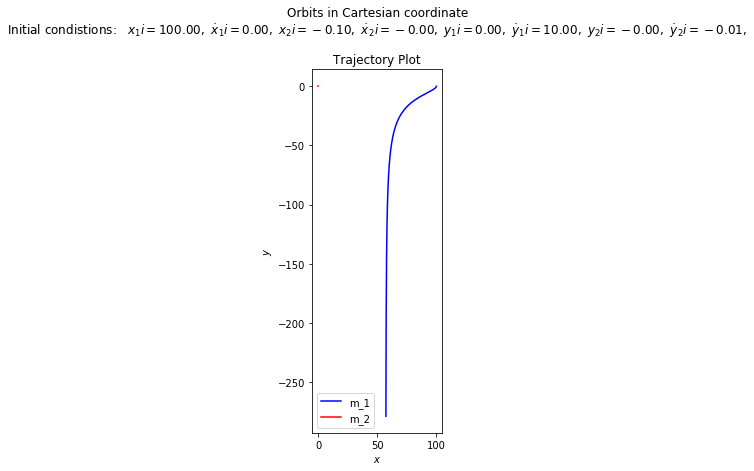

In [96]:
x_1i = 100.
x_1i_dot = 0
x_2i = m_1 * x_1i / (-m_2)
x_2i_dot = m_1 * x_1i_dot / (-m_2)
y_1i = 0
y_1i_dot = 10.
y_2i = m_1 * y_1i / (-m_2)
y_2i_dot = m_1 * y_1i_dot / (-m_2)

tb = TwoBody(m_1 = m_1, m_2 = m_2, G = G)

x_1, x_1_dot, x_2, x_2_dot, y_1, y_1_dot, y_2, y_2_dot = tb.solve_ode(t_pts, x_1i, x_1i_dot, x_2i, x_2i_dot, 
                                                              y_1i, y_1i_dot, y_2i, y_2i_dot)


# Labels for individual plot axes
trajectory_labels = (r'$x$', r'$y$')

# start the plot!
fig = plt.figure(figsize=(15,6))

overall_title = 'Orbits in Cartesian coordinate' + \
                '\n' + \
                'Initial condistions:  ' + \
                rf' $x_1i = {x_1i:.2f},$' + \
                rf' $\dot x_1i = {x_1i_dot:.2f},$' + \
                rf' $x_2i = {x_2i:.2f},$' + \
                rf' $\dot x_2i = {x_2i_dot:.2f},$' + \
                rf' $y_1i = {y_1i:.2f},$' + \
                rf' $\dot y_1i = {y_1i_dot:.2f},$' + \
                rf' $y_2i = {y_2i:.2f},$' + \
                rf' $\dot y_2i = {y_2i_dot:.2f},$' + \
                '\n'    
fig.suptitle(overall_title, va='baseline')

# trajectory plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=trajectory_labels, 
            color='blue',
            label='m_1', 
            title='Trajectory Plot',
            ax=ax_a)  

plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=trajectory_labels,
            color='red',
            label='m_2', 
            ax=ax_a)  

ax_a.set_aspect(1)
fig.tight_layout()
#fig.savefig('orbit_heavy_mass.pdf', bbox_inches='tight')  